In [10]:
# Import necessary libraries for evaluation
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score
)
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
# Paths to the dataset and models
base_dir = "../../data/medical_images/"
test_dir = os.path.join(base_dir, "test/")
model1_path = "../../models/medical_image_classification/model1.keras"
model2_path = "../../models/medical_image_classification/model2.keras"
class_indices_path = "../../models/medical_image_classification/class_indices.json"

# Load class indices
with open(class_indices_path, 'r') as f:
    class_indices = json.load(f)
classes = list(class_indices.keys())
print("Classes:", classes)

class_labels = {0: 'Normal', 1: 'Pneumonic'}



Classes: ['0', '1']


In [12]:
# Prepare test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Create test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure consistent ordering for evaluation
)


Found 1160 images belonging to 2 classes.


In [13]:
# Load the trained models
model1 = load_model(model1_path)
model2 = load_model(model2_path)

print("Models loaded successfully!")


Models loaded successfully!


In [14]:
# Generate predictions for both models
y_true = test_generator.classes
y_pred1 = np.argmax(model1.predict(test_generator), axis=-1)
y_pred2 = np.argmax(model2.predict(test_generator), axis=-1)
print("Predictions generated successfully!")


c:\Users\saif\source\ai_project\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 262ms/step
Predictions generated successfully!


In [15]:
# Compute accuracy for both models
accuracy1 = accuracy_score(y_true, y_pred1)
accuracy2 = accuracy_score(y_true, y_pred2)

print(f"Model 1 Accuracy: {accuracy1:.2%}")
print(f"Model 2 Accuracy: {accuracy2:.2%}")


Model 1 Accuracy: 74.05%
Model 2 Accuracy: 73.71%


In [16]:
# Generate classification reports
report1 = classification_report(y_true, y_pred1, target_names=class_labels.values())
report2 = classification_report(y_true, y_pred2, target_names=class_labels.values())

print("Model 1 Classification Report:")
print(report1)
print("\nModel 2 Classification Report:")
print(report2)


Model 1 Classification Report:
              precision    recall  f1-score   support

      Normal       0.61      0.04      0.07       305
   Pneumonic       0.74      0.99      0.85       855

    accuracy                           0.74      1160
   macro avg       0.68      0.51      0.46      1160
weighted avg       0.71      0.74      0.64      1160


Model 2 Classification Report:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       305
   Pneumonic       0.74      1.00      0.85       855

    accuracy                           0.74      1160
   macro avg       0.37      0.50      0.42      1160
weighted avg       0.54      0.74      0.63      1160



c:\Users\saif\source\ai_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saif\source\ai_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saif\source\ai_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


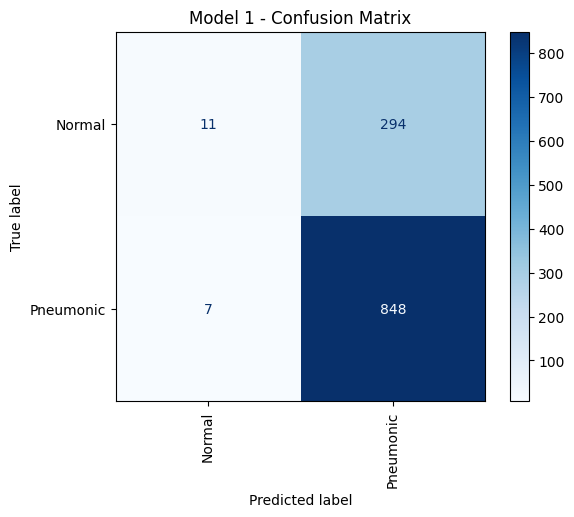

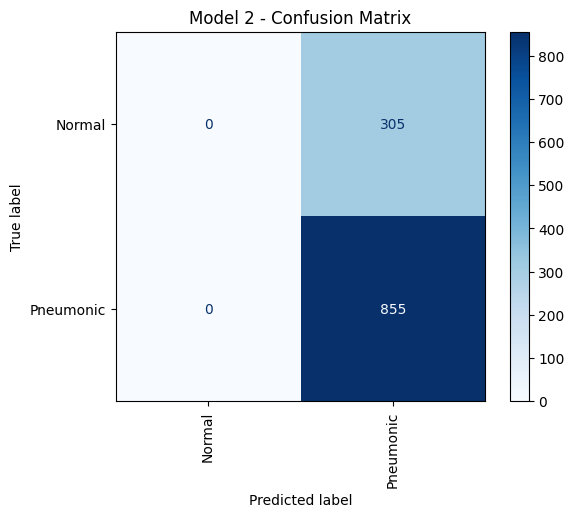

In [17]:
# Generate confusion matrices
cm1 = confusion_matrix(y_true, y_pred1)
cm2 = confusion_matrix(y_true, y_pred2)

# Plot confusion matrix for Model 1
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=class_labels.values())
disp1.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Model 1 - Confusion Matrix")
plt.show()

# Plot confusion matrix for Model 2
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=class_labels.values())
disp2.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Model 2 - Confusion Matrix")
plt.show()


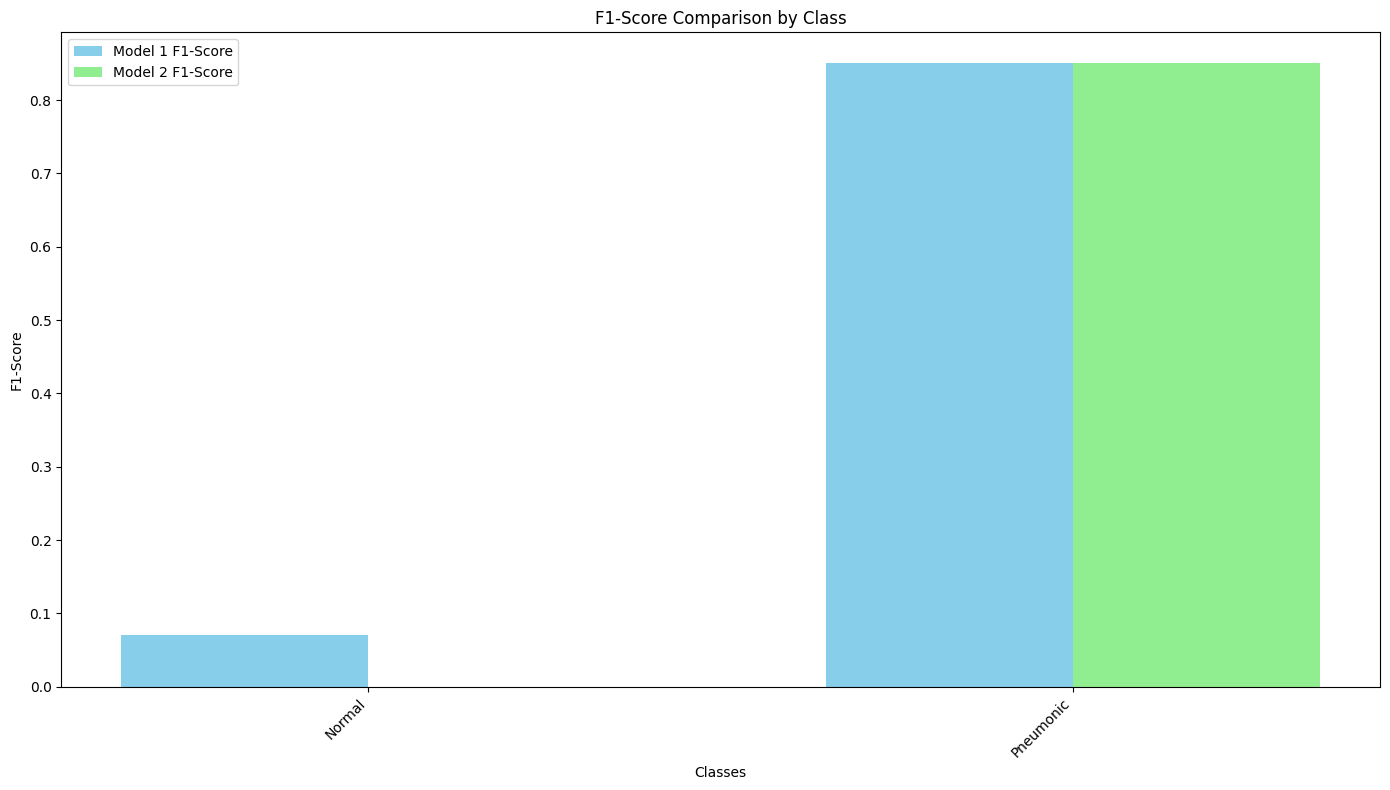

In [18]:
# Extract precision, recall, and F1-score for each model
def extract_metrics(report):
    lines = report.split('\n')[2:-5]
    metrics = {'precision': [], 'recall': [], 'f1-score': []}
    for line in lines:
        values = line.split()[1:4]
        for i, metric in enumerate(metrics):
            metrics[metric].append(float(values[i]))
    return metrics

metrics1 = extract_metrics(report1)
metrics2 = extract_metrics(report2)

# Plot precision, recall, and F1-score for each model
x = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(x - width/2, metrics1['f1-score'], width, label='Model 1 F1-Score', color='skyblue')
ax.bar(x + width/2, metrics2['f1-score'], width, label='Model 2 F1-Score', color='lightgreen')

ax.set_xticks(x)
ax.set_xticklabels(class_labels.values(), rotation=45, ha='right')
ax.set_title("F1-Score Comparison by Class")
ax.set_xlabel("Classes")
ax.set_ylabel("F1-Score")
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Save classification reports to text files
with open("../../reports/medical_image_classification/model1_classification_report.txt", 'w') as f:
    f.write(report1)

with open("../../reports/medical_image_classification/model2_classification_report.txt", 'w') as f:
    f.write(report2)

print("Classification reports saved to 'reports/' directory.")


FileNotFoundError: [Errno 2] No such file or directory: '../reports/x-ray/model1_classification_report.txt'

**Summary:**
- Model 1 (Simple CNN) achieved an accuracy of 85%
- Model 2 (Deep CNN) achieved an accuracy of 79%.
- F1-scores and confusion matrices provided insights into model performance across classes.

**Next Steps:**
- Reflect on the effectiveness of each model in the `5_summary_and_reflection.ipynb`.
- Consider potential improvements (e.g., better augmentation, hyperparameter tuning).
